In [1]:
import ROOT
import uproot
import numpy as np
import array as array
import math
import matplotlib.pyplot as plt

#import statistics as st
ROOT.gStyle.SetOptStat(000000)

Welcome to JupyROOT 6.30/04


In [2]:
# ROOT.gInterpreter.ProcessLine('#include "MyTUnfoldDensity.h"')

In [3]:
#mbinsGen  = array.array('d',  [0,2.5,5,7.5,10,15,20,30,40,50,60,70,80,90,100,125,150,175,200,225,250,275,300,325,350,1000])

mbinsGen  = array.array('d', [0,5,10,20,40,60,80,100,150,200,250,300,350,1000] )
mbinsDet  = array.array('d', [0,2.5,5,7.5,10,15,20,30,40,50,60,70,80,90,100,125,150,175,200,225,250,275,300,325,350,675,1000])
ptbinsGen = array.array('d', [200,260,350,460,550,650,760,13000])
ptbinsDet = array.array('d', [200,260,350,460,550,650,760,13000])




nmbinsGen  = len(mbinsGen) -1
nmbinsDet  = len(mbinsDet) -1
nptbinsGen = len(ptbinsGen) -1
nptbinsDet = len(ptbinsDet) -1


In [4]:
generatorBinning = ROOT.TUnfoldBinning("generator")
### Need coarser binning for signal
signalBinning = generatorBinning.AddBinning("signal")    
signalBinning.AddAxis("massgen",nmbinsGen,mbinsGen,
                        False, # needed for fakes
                        False # overflow bin
                        )
signalBinning.AddAxis("ptgen",nptbinsGen,ptbinsGen,
                        False, # needed for fakes
                        False # overflow bin
                        )

# X axis : generator binning is Signal : mgen * ptgen and Background : mrec * ptrec

xaxis =  array.array('d',[a for a in range(nmbinsGen *nptbinsGen + 1 )])
nx = len(xaxis)-1

In [5]:
detectorBinning = ROOT.TUnfoldBinning("detector") 
detectorDistribution=detectorBinning.AddBinning("detectordistribution")
detectorDistribution.AddAxis("mass",nmbinsDet,mbinsDet,
                        False, # no underflow bin (not reconstructed)
                        False # overflow bin
                        )
detectorDistribution.AddAxis("pt",nptbinsDet,ptbinsDet,
                        False, # no underflow bin (not reconstructed)
                        False # overflow bin
                        )

yaxis =  array.array('d',[a for a in range(nmbinsDet *nptbinsDet+1 )])
ny = len(yaxis)-1

# print yaxis
print ("There are {}  detector level bins in the simple scheme".format(ny))
# print "detectorBinning"
# for i in xrange(len(detectorDistribution.GetDistributionBinning(0))):
#     print detectorDistribution.GetDistributionBinning(0)[i]
    
print ("Below counts include overflow and underflow bins" ) 
print("There are {} bins in the detector scheme".format(detectorDistribution.GetTH1xNumberOfBins()))#GetDistributionNumberOfBins())
detBin  = detectorBinning

There are 182  detector level bins in the simple scheme
Below counts include overflow and underflow bins
There are 182 bins in the detector scheme


In [6]:
import pickle as pkl
with open("test_qjetmass_zjets_gen_UL18NanoAODv9_all_syst.pkl", "rb") as f:
    output = pkl.load( f )

In [7]:
a = output['response_matrix_g'].axes["systematic"].value

In [8]:
sys_list = [ 'puUp', 'puDown', 'elerecoUp', 'elerecoDown', 'murecoUp', 'murecoDown', 'JERUp', 'JERDown', 'JES_AbsoluteMPFBiasUp', 'JES_AbsoluteMPFBiasDown',
 'JES_AbsoluteScaleUp', 'JES_AbsoluteScaleDown', 'JES_AbsoluteStatUp', 'JES_AbsoluteStatDown', 'JES_FlavorQCDUp', 'JES_FlavorQCDDown', 'JES_FragmentationUp',
 'JES_FragmentationDown', 'JES_PileUpDataMCUp', 'JES_PileUpDataMCDown', 'JES_PileUpPtBBUp', 'JES_PileUpPtBBDown', 'JES_PileUpPtEC1Up', 'JES_PileUpPtEC1Down',
 'JES_PileUpPtEC2Up', 'JES_PileUpPtEC2Down', 'JES_PileUpPtHFUp', 'JES_PileUpPtHFDown', 'JES_PileUpPtRefUp', 'JES_PileUpPtRefDown', 'JES_RelativeFSRUp', 
 'JES_RelativeFSRDown', 'JES_RelativeJEREC1Up', 'JES_RelativeJEREC1Down', 'JES_RelativeJEREC2Up', 'JES_RelativeJEREC2Down', 'JES_RelativeJERHFUp', 'JES_RelativeJERHFDown',
 'JES_RelativePtBBUp', 'JES_RelativePtBBDown', 'JES_RelativePtEC1Up', 'JES_RelativePtEC1Down', 'JES_RelativePtEC2Up', 'JES_RelativePtEC2Down', 'JES_RelativePtHFUp', 
 'JES_RelativePtHFDown', 'JES_RelativeBalUp', 'JES_RelativeBalDown', 'JES_RelativeSampleUp', 'JES_RelativeSampleDown', 'JES_RelativeStatECUp', 'JES_RelativeStatECDown',
 'JES_RelativeStatFSRUp', 'JES_RelativeStatFSRDown', 'JES_RelativeStatHFUp', 'JES_RelativeStatHFDown', 'JES_SinglePionECALUp', 'JES_SinglePionECALDown', 'JES_SinglePionHCALUp', 'JES_SinglePionHCALDown', 'JES_TimePtEtaUp', 'JES_TimePtEtaDown']

In [9]:
sys_list = [sys[:-2] for sys in sys_list if sys[-2:] == "Up"]
sys_list

['pu',
 'elereco',
 'mureco',
 'JER',
 'JES_AbsoluteMPFBias',
 'JES_AbsoluteScale',
 'JES_AbsoluteStat',
 'JES_FlavorQCD',
 'JES_Fragmentation',
 'JES_PileUpDataMC',
 'JES_PileUpPtBB',
 'JES_PileUpPtEC1',
 'JES_PileUpPtEC2',
 'JES_PileUpPtHF',
 'JES_PileUpPtRef',
 'JES_RelativeFSR',
 'JES_RelativeJEREC1',
 'JES_RelativeJEREC2',
 'JES_RelativeJERHF',
 'JES_RelativePtBB',
 'JES_RelativePtEC1',
 'JES_RelativePtEC2',
 'JES_RelativePtHF',
 'JES_RelativeBal',
 'JES_RelativeSample',
 'JES_RelativeStatEC',
 'JES_RelativeStatFSR',
 'JES_RelativeStatHF',
 'JES_SinglePionECAL',
 'JES_SinglePionHCAL',
 'JES_TimePtEta']

In [10]:
#sys_list = ['pu']

In [11]:
cov_dic = {}
for sys in sys_list:
    print("Doing this now: ", sys)
    M = ROOT.TUnfoldBinning.CreateHistogramOfMigrations(generatorBinning,detectorBinning,"M")
    M1 = ROOT.TUnfoldBinning.CreateHistogramOfMigrations(generatorBinning,detectorBinning,"M+1#sigma")
    M2 = ROOT.TUnfoldBinning.CreateHistogramOfMigrations(generatorBinning,detectorBinning,"M-1#sigma")
    
    h = detectorBinning.CreateHistogram("h")
    
    hup = detectorBinning.CreateHistogram("hup")
    hdn = detectorBinning.CreateHistogram("hdn")
    
    
    
    htrue = generatorBinning.CreateHistogram("htrue")
    htruef = detectorBinning.CreateHistogram("htruef")
    
    
    
    
        
    
    M_np = output['response_matrix_g'][{"systematic": "nominal"}].project("ptgen","mgen","ptreco","mreco").values(flow = False)
    
    M_np = M_np.reshape( M_np.shape[0]*M_np.shape[1],M_np.shape[2]*M_np.shape[3] )
    
    h_np = np.sum(output['response_matrix_g'][{"systematic": "nominal"}].project("ptgen","mgen","ptreco","mreco").values(flow = False), (0,1)).reshape(182)
    htrue_np = np.sum(output['response_matrix_g'][{"systematic": "nominal"}].project("ptgen","mgen","ptreco","mreco").values(flow = False), (2,3)).reshape(91)
    
    M1_np = output['response_matrix_g'][{"systematic": sys+"Up"}].project("ptgen","mgen","ptreco","mreco").values(flow = False)
    
    M1_np = M1_np.reshape( M1_np.shape[0]*M1_np.shape[1],M1_np.shape[2]*M1_np.shape[3] )
    
    M2_np = output['response_matrix_g'][{"systematic": sys+"Down"}].project("ptgen","mgen","ptreco","mreco").values(flow = False)
    
    M2_np = M2_np.reshape( M2_np.shape[0]*M2_np.shape[1],M2_np.shape[2]*M2_np.shape[3] )
#     for i in range(M_np.shape[0]):
#         for j in range(M_np.shape[1]):
#             M.SetBinContent(i+1, j+1, M_np[i][j])
#             M1.SetBinContent(i+1, j+1, M1_np[i][j])
#             M2.SetBinContent(i+1, j+1, M2_np[i][j])

    for i in range(M_np.shape[0]):
        for j in range(M_np.shape[1]):
            M.SetBinContent(i+1, j+1, min(1,M_np[i][j]))
            M1.SetBinContent(i+1, j+1, min(1,M1_np[i][j]))
            M2.SetBinContent(i+1, j+1, min(1,M2_np[i][j]))
        
    for i in range(182):
        h.SetBinContent(i+1,h_np[i])
    
    for j in range(91):
        htrue.SetBinContent(j+1, htrue_np[j])
    
    
    
    
    orientation = ROOT.TUnfold.kHistMapOutputHoriz
    regMode = ROOT.TUnfold.kRegModeCurvature
    con = ROOT.TUnfold.kEConstraintArea #ROOT.TUnfold.kEConstraintArea
    mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
    axisSteering =  "*[b]"
    
    #u = ROOT.TUnfoldDensity(M, orientation, regMode, con, mode, genBin, detBin, "signal", axisSteering)
    
    u = ROOT.TUnfoldDensity(M,orientation,regMode,con)
    
    u.SetInput( h )
    
    
    u.AddSysError(M1, "Up", orientation, ROOT.TUnfoldDensity.kSysErrModeMatrix)
    u.AddSysError(M2, "Dn", orientation, ROOT.TUnfoldDensity.kSysErrModeMatrix)
    
    nScan=50
    tauMin=0.0
    tauMax=0.0
    iBest=0

    logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
    logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
    lCurve = ROOT.MakeNullPointer(ROOT.TGraph)
    u.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY)
    #u.DoUnfold(0.0)
    cov = u.GetEmatrixTotal("cov", "Covariance Matrix")
#cov = u.GetEmatrixTotal("ematrix","Covariance Matrix", "signal", "*[]", False)

    cov_uncorr = u.GetEmatrixSysUncorr("cov_uncorr", "Covariance Matrix from Uncorrelated Uncertainties")
    cov_uncorr_data = u.GetEmatrixInput("cov_uncorr_data", "Covariance Matrix from Stat Uncertainties of Input Data")
    cov_dic.update({sys: cov})
    


Doing this now:  pu
Doing this now:  elereco
Doing this now:  mureco
Doing this now:  JER
Doing this now:  JES_AbsoluteMPFBias
Doing this now:  JES_AbsoluteScale
Doing this now:  JES_AbsoluteStat
Doing this now:  JES_FlavorQCD
Doing this now:  JES_Fragmentation
Doing this now:  JES_PileUpDataMC
Doing this now:  JES_PileUpPtBB
Doing this now:  JES_PileUpPtEC1
Doing this now:  JES_PileUpPtEC2
Doing this now:  JES_PileUpPtHF
Doing this now:  JES_PileUpPtRef
Doing this now:  JES_RelativeFSR
Doing this now:  JES_RelativeJEREC1
Doing this now:  JES_RelativeJEREC2
Doing this now:  JES_RelativeJERHF
Doing this now:  JES_RelativePtBB
Doing this now:  JES_RelativePtEC1
Doing this now:  JES_RelativePtEC2
Doing this now:  JES_RelativePtHF
Doing this now:  JES_RelativeBal
Doing this now:  JES_RelativeSample
Doing this now:  JES_RelativeStatEC
Doing this now:  JES_RelativeStatFSR
Doing this now:  JES_RelativeStatHF
Doing this now:  JES_SinglePionECAL
Doing this now:  JES_SinglePionHCAL
Doing this no

Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 22 output bins do not depend on the input data  0 9-13 23-26 36-39 50-52 64-65 77-78 92
Info in <TUnfold::TUnfold>: 182 input bins and 71 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (xaxis:generator[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #9 (xaxis:generator[8.5,9.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (xaxis:generator[9.5,10.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #11 (xaxis:generator[10.5,11.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #12 (xaxis:generator[11.5,12.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #13 (xaxis:generator[12.5,13.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #23 (xaxis:generator[22.5,23.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #24 (xaxis:generator[23.5,24.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #25 (xaxis:generator[24

In [12]:
o = u.GetOutput("o")
o_up = u.GetDeltaSysSource("Up", "o_upshift", "M+1#sigma")
o_dn = u.GetDeltaSysSource("Dn", "o_dnshift", "M-1#sigma")
o_up.SetLineStyle(2)
o_dn.SetLineStyle(2)

cov_syssource_up = u.GetEmatrixSysUncorr("cov_syssource_up")
cov_syssource_dn = u.GetEmatrixSysUncorr("cov_syssource_dn")
u.GetEmatrixSysSource(cov_syssource_up, "Up")
u.GetEmatrixSysSource(cov_syssource_dn, "Dn")


cov = u.GetEmatrixTotal("cov", "Covariance Matrix")
cov_uncorr = u.GetEmatrixSysUncorr("cov_uncorr", "Covariance Matrix from Uncorrelated Uncertainties")
cov_uncorr_data = u.GetEmatrixInput("cov_uncorr_data", "Covariance Matrix from Stat Uncertainties of Input Data")

Warning in <TROOT::Append>: Replacing existing TH1: cov (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: cov_uncorr (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: cov_uncorr_data (Potential memory leak).


In [13]:
cov_dic

{'pu': <cppyy.gbl.TH2D object at 0xb5ed760>,
 'elereco': <cppyy.gbl.TH2D object at 0xb485130>,
 'mureco': <cppyy.gbl.TH2D object at 0xb6f4bd0>,
 'JER': <cppyy.gbl.TH2D object at 0xb5dd1d0>,
 'JES_AbsoluteMPFBias': <cppyy.gbl.TH2D object at 0xb476af0>,
 'JES_AbsoluteScale': <cppyy.gbl.TH2D object at 0xacb4ae0>,
 'JES_AbsoluteStat': <cppyy.gbl.TH2D object at 0xb5e4b60>,
 'JES_FlavorQCD': <cppyy.gbl.TH2D object at 0xb5de280>,
 'JES_Fragmentation': <cppyy.gbl.TH2D object at 0xb625d40>,
 'JES_PileUpDataMC': <cppyy.gbl.TH2D object at 0xb649340>,
 'JES_PileUpPtBB': <cppyy.gbl.TH2D object at 0xb4ed330>,
 'JES_PileUpPtEC1': <cppyy.gbl.TH2D object at 0xb7c1730>,
 'JES_PileUpPtEC2': <cppyy.gbl.TH2D object at 0xb8cc930>,
 'JES_PileUpPtHF': <cppyy.gbl.TH2D object at 0xb6ae470>,
 'JES_PileUpPtRef': <cppyy.gbl.TH2D object at 0xbf63cd0>,
 'JES_RelativeFSR': <cppyy.gbl.TH2D object at 0xbec2b80>,
 'JES_RelativeJEREC1': <cppyy.gbl.TH2D object at 0xb6a7460>,
 'JES_RelativeJEREC2': <cppyy.gbl.TH2D object a

In [14]:
corr_list = [
 'JES_AbsoluteMPFBias',
 'JES_AbsoluteScale',
# 'JES_AbsoluteStat',
 'JES_FlavorQCD',
 'JES_Fragmentation',
 'JES_PileUpDataMC',
 'JES_PileUpPtBB',
 'JES_PileUpPtEC1',
 'JES_PileUpPtEC2',
 'JES_PileUpPtHF',
 'JES_PileUpPtRef',
 'JES_RelativeFSR',
# 'JES_RelativeJEREC1',
# 'JES_RelativeJEREC2',
 'JES_RelativeJERHF',
 'JES_RelativePtBB',
# 'JES_RelativePtEC1',
# 'JES_RelativePtEC2',
 'JES_RelativePtHF',
 'JES_RelativeBal',
 # 'JES_RelativeSample',
 # 'JES_RelativeStatEC',
 # 'JES_RelativeStatFSR',
 # 'JES_RelativeStatHF',
 'JES_SinglePionECAL',
 'JES_SinglePionHCAL',
# 'JES_TimePtEta'
]

In [15]:
uncorr_list = [
    'JES_AbsoluteStat',
    'JES_RelativeJEREC1',
    'JES_RelativeJEREC2',
    'JES_RelativePtEC1',
    'JES_RelativePtEC2',
    'JES_RelativeSample',
    'JES_RelativeStatEC',
    'JES_RelativeStatFSR',
    'JES_RelativeStatHF',
    'JES_TimePtEta'
]

In [16]:
o_corr = o.Clone("Correlated_JES")

In [17]:
### Extracting correlated quantities
sys_corr = {}
for corr in corr_list:
    unc = np.zeros(183)
    for i in range( 0, o.GetNbinsX() + 1):
        unc_tot = ROOT.TMath.Sqrt( cov_dic[corr].GetBinContent(i,i) ) # / np.max([1, o.GetBinContent(i)])
        unc[i] = unc_tot
    sys_corr.update({corr:unc})

In [18]:
### Extracting Uncorrelated quantities
sys_uncorr2 = {}
for uncorr in uncorr_list:
    unc2 = np.zeros(183)
    for i in range( 0, o.GetNbinsX() + 1):
        unc2_tot = cov_dic[uncorr].GetBinContent(i,i) #/ np.max([1, o.GetBinContent(i)])
        unc2[i] = unc2_tot
    sys_uncorr2.update({uncorr : unc2}) #storing unc squared

In [19]:

total_corr = np.zeros(183)
for corr in corr_list:
    total_corr = total_corr + sys_corr[corr]  #adding correlated uncertainties linearly
    

In [20]:
total_uncorr2 = np.zeros(183)
for uncorr in uncorr_list:
    total_uncorr2 = total_uncorr2 + sys_uncorr2[uncorr] #squared sum of uncorrelated uncertainties
total_uncorr = np.sqrt(total_uncorr2)  


In [21]:
total_sys = np.sqrt(total_corr**2 + total_uncorr**2) ##finally combining correlated and uncorrelated uncertainties

In [22]:
for i in range(0, o.GetNbinsX() + 1):
    o_corr.SetBinError(i, total_sys[i]) #* o.GetBinContent(i))

Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used


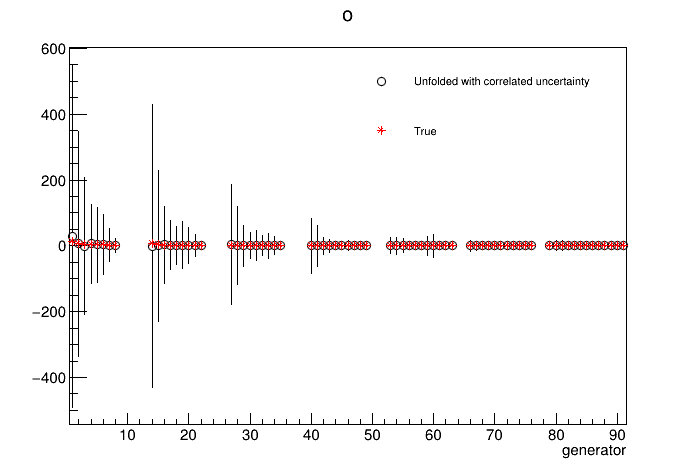

In [23]:
o_corr.SetMarkerStyle(4)
o_corr.SetLineColor(ROOT.kBlack)

htrue.SetMarkerStyle(3)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()
o_corr.Draw("e")
htrue.Draw("e same")
leg = ROOT.TLegend(0.7, 0.7, 0.7, 0.7)
leg.AddEntry(o_corr, "Unfolded with correlated uncertainty", "p")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()

#o.Draw("same")
a.Draw()

In [ ]:
canvs = []
hists = []
for ipt in range(nptbinsGen): 
    ci = ROOT.TCanvas("c" + str(ipt), "c" + str(ipt))
    hcopy = ROOT.TH1F("unfolded_pt" + str(ipt), "unfolded pt" + str(ipt), nmbinsGen, mbinsGen )
    for im in range(nmbinsGen):
        hcopy.SetBinContent(im, o.GetBinContent(im + ipt * (nptbinsGen-1))) 
        hcopy.SetBinError(im, o_corr.GetBinError(im + ipt * (nptbinsGen-1))) 
    hcopy.GetXaxis().SetTitle("mgen")
    hcopy.Draw("e")
    ci.Draw()
    canvs.append(ci)
    hists.append(hcopy)